## Часть 1. Парсинг (10 баллов)

Мы предлагаем вам распарсить часть данных litres.ru — а именно часть про книги, имеющие отношение к программированию.

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.)
*Подсказка.* Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

В дальнейшем вам нужно будет анализировать полученный у вас датасет.

Если у вас не получилось спарсить датасет, воспользуйтесь для последующих пунктов готовым датасетом: https://disk.yandex.ru/d/2UZet2-qxRxF6Q

 Так вы сможете получить баллы за вторую часть.

(Датасет неидеален, с ним придется поработать!)

**Парсите "вежливо": используйте time.sleep() не меньше 1-2 секунд между запросами к сайту!**

## Часть 2. EDA (30 баллов)

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
2. Есть ли в датасете пропуски? (0.5)
3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).
4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

8. Выведите топ-10 книг по числу отзывов. (2).

9. Найдите среднюю длину отзыва (в символах). (2)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

In [70]:
from ast import literal_eval
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('litres_programming_data.csv', index_col=0)

In [71]:
# task: 1.1

# Выведите первые 5 строк датасета.

df.head()

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


In [72]:
# task: 1.2

# Сколько в нём строк и столбцов?

rows, columns = df.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 965, Columns: 12


In [73]:
# task: 2

# Есть ли в датасете пропуски? 

print(f'Nulls: {df.isna().any().any()}')

Nulls: False


In [74]:
# task: 3

# Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами.

# nothing to do

In [75]:
# task: 4

# Выведите описательные статистики переменных. Ответьте на следующие вопросы:
# 1) Какая медианная цена книги в вашем датасете? (1)  
# 2) Какое возрастное ограничение встречается чаще всего? (1)  
# 3) Какое среднее число отзывов в книге? (1)  
# 4) Сколько книг имеют оценку ниже 4.25? (1)  
# 5) В каком году было написано больше всего книг из датасета?

print(f'median: {df['price'].median()}')
print(f'age mode: {df['age'].mode()[0]}')
print(f'review_count mean: {df['review_count'].mean()}')
print(f'rating < 4.25 count: {len(df[df['rating'] < 4.25])}')
print(f'year mode: {df['year'].mode()[0]}')

median: 200.0
age mode: 0+
review_count mean: 1.6031088082901555
rating < 4.25 count: 619
year mode: 2021


In [76]:
# task 5

# Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц.

def parse_pages(row):
    elems = row.split()

    if len(elems) == 0:
        return int(elems)

    return int(elems[0])


page_count = df['pages'].apply(parse_pages)
page_count

0       102
1       831
3       130
4        10
7       166
       ... 
1192    223
1193    345
1195     16
1196    576
1197     10
Name: pages, Length: 965, dtype: int64

In [77]:
# task 6

# Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях.

def is_popular(row):
    return 1 if row['rating'] >= 4.6 and row['review_count'] >= 5 else 0


df['is_popular'] = df.apply(is_popular, axis=1)
df

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023,1
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023,0
3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019,0
4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021,0
7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Основы вычислений и программирования в пакете ...,а. ф. задорожный,https://www.litres.ru/book/a-f-zadorozhnyy/osn...,0.0,0,0,676.0,223 стр.,223,[],0+,2023,0
1193,Справочник Жаркова по проектированию и програм...,Валерий Алексеевич Жарков,https://www.litres.ru/book/valeriy-zharkov-324...,0.0,0,0,990.0,345 стр. 93 иллюстрации,345,[],12+,2023,0
1195,Применение компьютерных систем моделирования т...,П. А. Кулагин,https://www.litres.ru/book/a-v-mischenko/prime...,0.0,0,0,168.0,16 стр.,16,[],0+,2017,0
1196,Основы TypeScript (pdf+epub),Адам Фримен,https://www.litres.ru/book/adam-frimen/osnovy-...,0.0,0,0,699.0,576 стр.,576,[],16+,2023,0


In [78]:
# task 7

# Как отличается среднее число страниц среди популярных и непопулярных книг?

print(f'Diff: {page_count[df['is_popular'] == 1].mean() - page_count[df['is_popular'] == 0].mean()}')

Diff: 164.34140541264736


In [79]:
# task 8

# Выведите топ-10 книг по числу отзывов.

df.sort_values(by='review_count', ascending=False).head(10)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023,1
961,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,599.0,224 стр.,224,['Прекрасная книга. Рекомендовал и старшим шко...,16+,2017,0
117,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,299.0,210 стр.,210,"['Отличная книга чтобы начать программировать,...",12+,2017,0
857,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231 стр. 20 иллюстраций,231,['Отличная серия! Обложки просто кайф. Много п...,12+,2023,1
605,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,699.0,512 стр.,512,"['Осторожно, под видом второго издания продает...",16+,2021,0
648,"Swift. Основы разработки приложений под iOS, i...",Василий Усов,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,499.0,545 стр.,545,['Книга хорошая. Все подробно описано. Единств...,16+,2021,0
107,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,268,17,690.0,212 стр. 5 иллюстраций,212,['Автор не перестает радовать годными книгами....,12+,2024,1
560,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215 стр. 10 иллюстраций,215,['Отличное руководство. Расписан каждый шаг. Д...,12+,2023,1
592,Программирование на C++ в примерах и задачах,Алексей Васильев,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,419.0,369 стр.,369,"['Я купил эту книгу в бумажном виде, прочитав ...",12+,2017,0
1174,1С:Программирование для начинающих. Детям и ро...,м. г. радченко,https://www.litres.ru/book/m-g-radchenko/1s-pr...,4.0,64,15,550.0,781 стр.,781,['Эту книгу я бы рекомендовала самой первой к ...,12+,2022,0


In [80]:
# task 9

# Найдите среднюю длину отзыва (в символах).


def parse_text_of_reviews(row):
    return literal_eval(row)


parsed_reviews = df['text_of_reviews'].apply(parse_text_of_reviews)

lens = [len(item) for sublist in parsed_reviews for item in sublist]
print(f'Mean review length: {sum(lens) / len(lens)}')

Mean review length: 208.51982160555005


In [81]:
# task 10.1

# Постройте таблицу корреляций числовых переменных.

df.drop(columns=['name', 'author', 'link', 'pages', 'text_of_reviews', 'age', 'is_popular']).corr()

,rating,rating_count,review_count,price,pages_count,year
rating,1.000000,0.257016,0.402186,0.410324,0.509376,0.264318
rating_count,0.257016,1.000000,0.683794,0.208341,0.135824,0.160573
review_count,0.402186,0.683794,1.000000,0.309463,0.348800,0.165968
price,0.410324,0.208341,0.309463,1.000000,0.639805,0.428793
pages_count,0.509376,0.135824,0.348800,0.639805,1.000000,0.201769
year,0.264318,0.160573,0.165968,0.428793,0.201769,1.000000


In [82]:
# task 10.2

# Прокомментируйте результаты.

# 1) Наибольшая корреляция между review_count и rating_count, что логично, так как чем больше книгу оценили, тем больше отзывов о ней.
# 2) Заметна корреляция между price и pages_count, что тоже логично, так как чем больше страниц, тем дороже книга.
# 3) Наименьшая корреляция между pages_count и rating, что тоже логично, так как количество страниц не влияет на оценку книги.

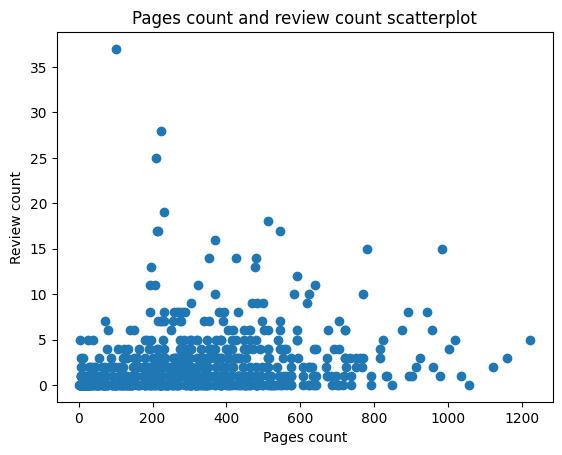

In [83]:
# task 11.1

# Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси.

plt.scatter(page_count, df['review_count'])
plt.xlabel('Pages count')
plt.ylabel('Review count')
plt.title('Pages count and review count scatterplot')
plt.show()

In [84]:
# task 11.2

# Прокомментируйте полученные результаты.

# На графике видно, что количество отзывов не зависит от количества страниц в книге.

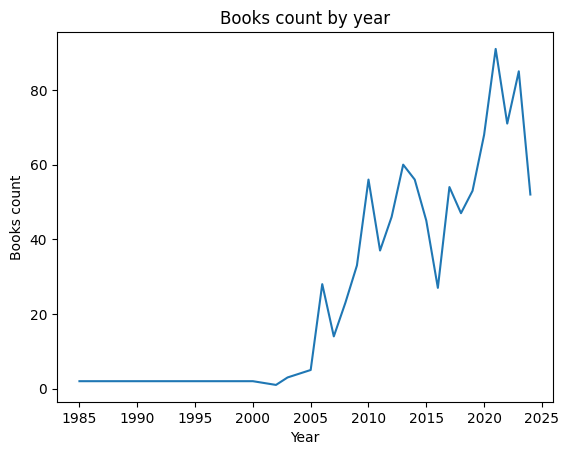

In [85]:
# task 12.1

# Постройте линейный график: по оси Х год, по оси Y количество книг.

df.groupby('year').size().plot()
plt.xlabel('Year')
plt.ylabel('Books count')
plt.title('Books count by year')
plt.show()

In [86]:
# task 12.2

# Прокомментируйте.

# 1) Отчетливо видно, что количество выпускаемых книг растет с каждым годом. 
# 2) Также видно, что 2005 год был переломным, так как в этом году начался резкий рост выпускаемых книг.

<Axes: xlabel='rating_count', ylabel='review_count'>

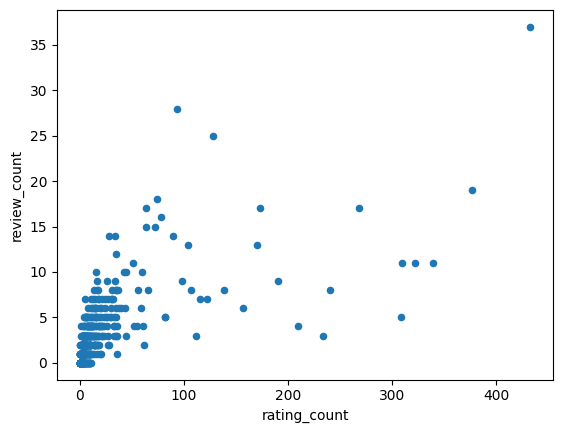

In [87]:
# task 13.1

# Постройте еще любые два графика по вашему усмотрению.

# 1) График зависимости review_count от rating_count

df.plot.scatter(x='rating_count', y='review_count')

<Axes: xlabel='price', ylabel='rating'>

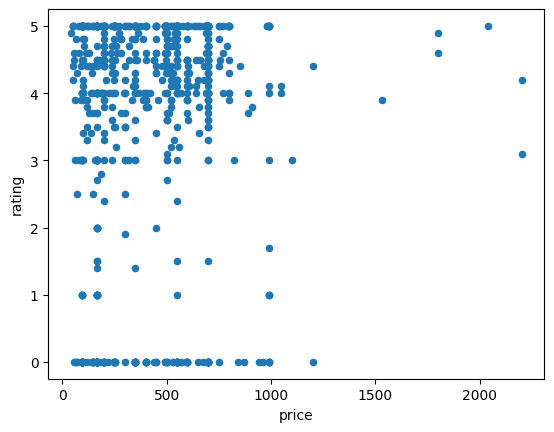

In [88]:
# task 13.1 (continued)

# 2) График зависимости rating от price

df.plot.scatter(x='price', y='rating')

In [89]:
# task 13.2

# Прокомментируйте полученные результаты.

# 1) На первом графике видно, что количество отзывов растет с увеличением количества оценок, что логично.
# 2) На втором графике видно, что цена книги не влияет на ее рейтинг.

In [90]:
# task 14

# Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов.

df.groupby('author').agg({'name': 'count', 'rating': 'mean', 'review_count': 'mean'})

,name,rating,review_count
author,,,
Arsen Gonian,1,5.0,1.0
C. И. Никишов,1,4.7,3.0
Eugeny Shtoltc,2,2.5,0.0
Jade Carter,1,0.0,0.0
Nulls,1,4.4,6.0
...,...,...,...
Ян Пойнтер,1,3.6,2.0
а. ф. задорожный,1,0.0,0.0
коллектив авторов,5,2.8,0.4


In [92]:
# task 15

# Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущем пункте. Мы никак не ограничиваем вашу фантазию!

# 1) Наиболее популярные книги (очевидно об ИИ :))
df[df['is_popular'] == 1].sort_values(by='rating', ascending=False).head(10)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
351,Искусственный интеллект в прикладных науках. Т...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/iskus...,5.0,122,7,690.0,230 стр. 1 иллюстрация,230,['Очень актуальная книга. Дает отличное предст...,12+,2024,1
981,Усиленное обучение,Джеймс Девис,https://www.litres.ru/book/dzheyms-devis-33032...,5.0,157,6,490.0,150 стр. 1 иллюстрация,150,"['когда думаешь, что вроде разобрался с темой ...",12+,2024,1
599,Создай свой VPN. Безопасное использование инте...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/sozda...,5.0,240,8,690.0,280 стр. 1 иллюстрация,280,['Нашел в книге решение своей ошибки. В общем ...,12+,2024,1
560,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215 стр. 10 иллюстраций,215,['Отличное руководство. Расписан каждый шаг. Д...,12+,2023,1
644,Программирование для дополнительной и виртуаль...,Джеймс Девис,https://www.litres.ru/book/dzheyms-denis/progr...,5.0,309,5,690.0,541 стр. 3 иллюстрации,541,"['Книга конечно не развлекательного характера,...",12+,2024,1
664,Нейросети. Обработка аудиоданных,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,310,11,690.0,206 стр. 11 иллюстраций,206,['Хочется больше картинок))) но тут же про зву...,12+,2023,1
356,Искусственный интеллект. Основные понятия,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/iskus...,5.0,322,11,690.0,323 стр. 23 иллюстрации,323,['Мне понравилось понятное и подробное описани...,12+,2024,1
857,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231 стр. 20 иллюстраций,231,['Отличная серия! Обложки просто кайф. Много п...,12+,2023,1
303,1С:Счетчик ворон. Мастер-класс по мобильной ра...,Алёна Шаронова,https://www.litres.ru/book/aygul-sultanova/1s-...,5.0,13,7,300.0,215 стр.,215,['1С:Счетчик ворон. Мастер-класс по мобильной ...,0+,2022,1
192,Тестирование JavaScript,Лукас да Коста,https://www.litres.ru/book/lukas-da-kosta/test...,5.0,5,5,799.0,592 стр.,592,"['Довольно не плохая книга, которая в полной м...",16+,2021,1


In [93]:
# task 15 (continued)

# 2) Книги с наибольшим количеством страниц

df.sort_values(by='pages_count', ascending=False).head(10)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
373,Программирование. Принципы и практика использо...,Бьерн Страуструп,https://www.litres.ru/book/byarne-straustrup/p...,4.4,29,5,1200.0,1223 стр.,1223,['Очень большая и очень толстая книжка от само...,0+,2009,0
656,1С:Предприятие 8.3. Практическое пособие разра...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/1s-p...,5.0,4,3,200.0,1160 стр.,1160,['Отличная книга которая стоит потраченных сре...,12+,2023,0
380,Spring 5 для профессионалов,Крис Шефер,https://www.litres.ru/book/klarens-ho/spring-5...,3.1,10,2,2200.0,1122 стр.,1122,['Взял ознакомительный фрагмент. Вроде слова е...,0+,2018,0
227,C++20 для программистов (pdf+epub),Харви Дейтел,https://www.litres.ru/book/pol-deytel/c-20-dly...,0.0,0,0,699.0,1056 стр.,1056,[],16+,2022,0
165,Системное программирование в Windows,Александр Побегайло,https://www.litres.ru/book/aleksandr-pobegaylo...,4.9,8,1,271.0,1034 стр.,1034,"['Неплохая книга, читал ее еще в институте (в ...",12+,2006,0
147,C# 10 и .NET 6. Современная кросс-платформенна...,Марк Дж. Прайс,https://www.litres.ru/book/mark-dzh-prays/c-10...,4.7,6,5,699.0,1019 стр.,1019,"['Пожалуй, лучшая книга для изучения C#, котор...",16+,2021,1
310,Unity и С#. Геймдев от идеи до реализации (pdf...,Джереми Гибсон Бонд,https://www.litres.ru/book/dzheremi-gibson-bon...,4.3,23,4,699.0,1002 стр.,1002,"['Довольно интересная литература, если только ...",16+,2018,0
943,1С:Предприятие 8.3. Практическое пособие разра...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/1s-p...,4.5,72,15,180.0,983 стр.,983,['Книга супер!!! Даю проверенный совет. Прошла...,12+,2023,0
577,PHP 8,Дмитрий Котеров,https://www.litres.ru/book/igor-simdyanov/php-...,4.5,2,1,599.0,979 стр.,979,"['Качественный труд. ', 'Глубокое уважение авт...",0+,2023,0
742,AutoLISP и Visual LISP в среде AutoCAD,Петр Лоскутов,https://www.litres.ru/book/nikolay-poleschuk/a...,4.6,10,2,263.9,959 стр.,959,"['Прекрасная, и наилучшая «Библия»-Энциклопеди...",0+,2006,0
